In [17]:
from scipy.stats import f_oneway
import pandas as pd
import numpy as np
import tellurium as te

import statsmodels.api as sm
from statsmodels.formula.api import ols

import seaborn as sns
from matplotlib.colors import LogNorm

### To show that each iteration on the same dataset is statistically the same

In [4]:
import os
os.getcwd()


'c:\\Users\\user\\Documents\\research\\BMCA-pipeline\\notebooks'

In [11]:
# load each of the 10 distributions

pt = [0.1, 0.2, 0.3, 0.4, 0.5, 1.01, 1.5, 3, 5, 7, 10]
iteration_folder = '../data/interim/generated_data/simplTeusink-noReg/iterations/'
# for each iteration of pt=1.01
exs101 = []
for folder in os.listdir(iteration_folder):
    # load the pt=1.01 dataset from each folder and append to exs101 list
    exs101.append(pd.read_csv(iteration_folder + folder +'/1.01x_PredictedExs.csv').values)


In [55]:
######### USER-INPUT SECTION
MODEL_FILE_PATH = '../data/interim/Antimony/Simplified_Teusink_yeast.ant'
######### END OF USER-INPUT SECTION

model = te.loada(MODEL_FILE_PATH)
gt=model.getScaledElasticityMatrix().flatten()

# Establish labels for metabolite and reaction names
m_labels = [m for m in model.getFloatingSpeciesIds()]
r_labels = [r for r in model.getReactionIds()]

ex_labels = np.array([['$\epsilon_{' + '{0},{1}'.format(rlabel, mlabel) + '}$'
                    for mlabel in m_labels] for rlabel in r_labels]).flatten()

ex_file_labels = np.array([['E_' + '{0},{1}'.format(rlabel, mlabel)
                    for mlabel in m_labels] for rlabel in r_labels]).flatten()

# load the predicted Ex dataset
# then reshape into 1000 rows, 176 columns
# plot all data in each column as a scatter plot
# make a plotting method
def run_ANOVA10(colNo):
    only_iter = []
    for df in exs101:
        only_iter.append(df.loc[:,ex_labels[colNo]])
        # sns.swarmplot(data=df, x=ex_labels[colNo], size=3, alpha=0.8)
    # run ANOVA
    return f_oneway(*only_iter)

def make_ANOVA_table(colNo):
    only_iter = []
    for df in exs101:
        only_iter.append(df.loc[:,ex_labels[colNo]])

    iter_df = pd.DataFrame(only_iter).T
    iter_df.columns=range(10)
    df = iter_df.stack().reset_index()
    df.drop(['level_0'], axis=1, inplace=True)
    df.columns=['iteration', 'value']
    # run ANOVA
    mod = ols('value ~ iteration',data=df).fit()
    print(sm.stats.anova_lm(mod, typ=1))

def 
    exs101 = []
    for folder in os.listdir(iteration_folder):
        # load the pt=1.01 dataset from each folder and append to exs101 list
        ex101=pd.read_csv(iteration_folder + folder +'/1.01x_PredictedExs.csv', index_col=0).values
        exs101.append(pd.DataFrame(ex101.reshape(1000,176), columns=ex_labels))
        



    fdict= {}
    for i in range(len(ex_labels)):
        fdict[ex_labels[i]]= [run_ANOVA10(i)[0]]

    a = pd.DataFrame.from_dict(fdict).T
    a['id'] = [idx.strip('$\epsilon_{}') for idx in a.index]
    a.reset_index()
    a['reaction'] = [i.split(',')[0] for i in a['id']]
    a['metabolite'] = [i.split(',')[1] for i in a['id']]
    a.set_index('id', inplace=True)
    a.rename(columns={0:'f-stat'}, inplace=True)
    b = pd.pivot(a, values='f-stat', index='reaction', columns='metabolite')

    sns.heatmap(b, norm=LogNorm())
    plt.title('ANOVA f-scores for BMCA iterations of 0.1x perturbation of data')

In [71]:

b

metabolite,ACE,BPG,F16P,F6P,G6P,GLC,P2G,P3G,PEP,PYR,TRIO
reaction,,,,,,,,,,,
vADH,11.611218,11.744218,10.751278,140.789950,15.887379,15.331697,19.496172,11.571817,6.145807,6.315704,18.319384
vALD,4.920340,9.061844,6.407801,6.185879,73.800731,3.880482,12.833273,15.983189,11.372307,52.973258,3.140801
vENO,124.651938,15.660434,13.034452,9.611856,19.934344,1.985058,11.143979,11.250162,2.017889,18.891008,141.166837
vG3PDH,6.868095,14.215584,6.100714,13.654344,90.916251,6.041081,10.294677,9.270752,8.018252,12.353819,11.531687
vGAPDH,25.154524,15.022839,6.889147,9.848793,81.631205,3.766538,39.467033,3.862090,15.925044,6.369952,12.458701
vGLK,3.953470,94.830261,17.795306,10.636939,5.228842,343.021125,11.918348,2.840960,12.110132,15.443588,11.273243
vGLT,15.711279,308.295582,5.670162,16.278677,13.348010,5.278383,14.162234,10.364356,9.964914,11.694491,1.160178
vGLYCO,6.298536,8.713670,8.841562,12.540610,12.145183,130.329977,10.400626,6.554928,6.178158,7.850803,12.213828
vPDC,6.982495,8.485464,13.951321,36.446754,6.904608,12.676375,12.948293,12.138395,120.652128,9.065193,5.249215


Text(0.5, 1.0, 'ANOVA f-scores for BMCA iterations of 0.1x perturbation of data')

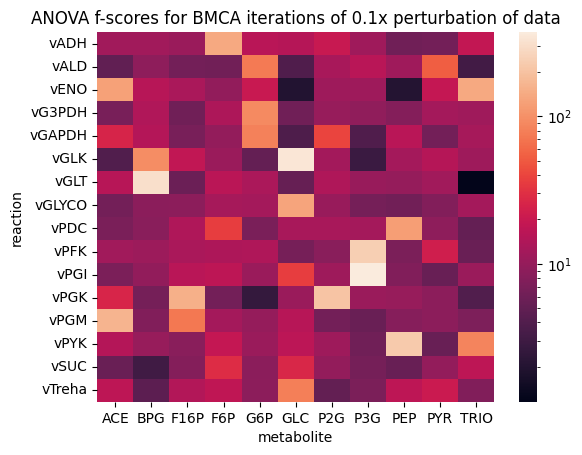